# Graph 3

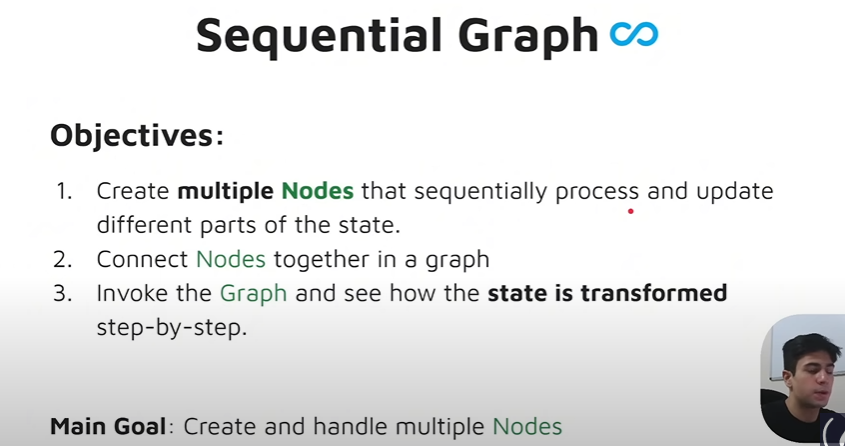

In [1]:
# Sequential Graph
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [3]:
def first_node(state:AgentState) -> AgentState:
    """This is the first node of our Sequence"""
    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node of our Sequence"""
    state["final"] = state["final"] + f"You are {state["age"]} years old!"
    return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")

# to connect from first node to second node we use "add_edge"
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

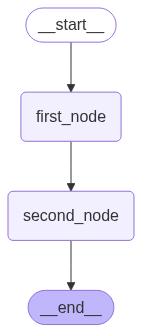

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"name":"Prathik", "age":24})
result["final"]

'Hi Prathik!You are 24 years old!'

# Exercise Graph 3
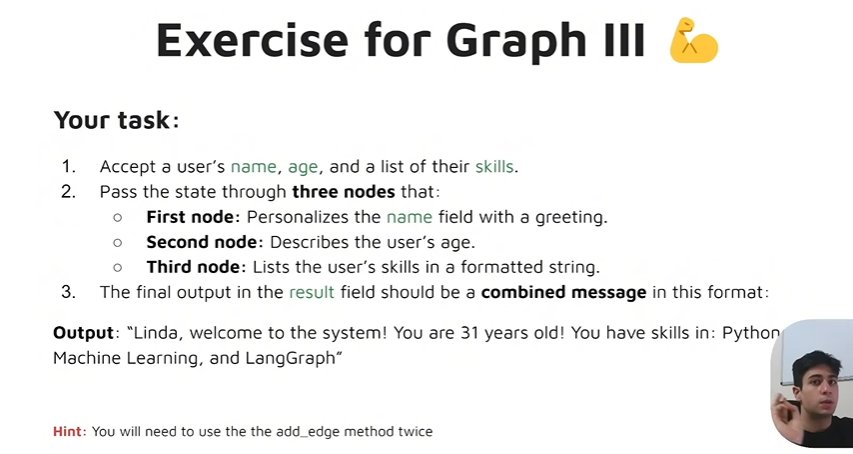

In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [11]:
class AgentGraph3(TypedDict):
    name : str
    values : List[str]
    age : str
    result: str

In [41]:
def first_node_graph3(state:AgentGraph3) -> AgentGraph3:
    """This is the function of first node of graph3"""
    state["result"] = f"{state["name"]}, welcome to the system! "
    return state

def second_node_graph3(state:AgentGraph3) -> AgentGraph3:
    """This is the second node of graph3"""
    state["result"] = state["result"] + f"you are {state["age"]} years old! "

    return state

def third_node_graph3(state:AgentGraph3) -> AgentGraph3:
    """Thsi is the function of the third node graph3"""
    state["result"] = state["result"] + f"You have skills in: {state["values"]}"
    return state


In [42]:
graph = StateGraph(AgentGraph3)

graph.add_node("Graph_node1", first_node_graph3)
graph.add_node("Graph_node2", second_node_graph3)
graph.add_node("Graph_node3", third_node_graph3)

graph.set_entry_point("Graph_node1")

graph.add_edge("Graph_node1", "Graph_node2")
graph.add_edge("Graph_node2", "Graph_node3")


graph.set_finish_point("Graph_node3")

app = graph.compile()


In [43]:
final = app.invoke({
    "name":"Prathik", 
    "age":24,
    "values":["Python", "CShaprp", "Machine Learning", "Neural Networks", "Langchain", "LangGraph","Augmented Reality(Unity)"]
})

final

{'name': 'Prathik',
 'values': ['Python',
  'CShaprp',
  'Machine Learning',
  'Neural Networks',
  'Langchain',
  'LangGraph',
  'Augmented Reality(Unity)'],
 'age': 24,
 'result': "Prathik, welcome to the system! you are 24 years old! You have skills in: ['Python', 'CShaprp', 'Machine Learning', 'Neural Networks', 'Langchain', 'LangGraph', 'Augmented Reality(Unity)']"}

In [44]:
final["result"]

"Prathik, welcome to the system! you are 24 years old! You have skills in: ['Python', 'CShaprp', 'Machine Learning', 'Neural Networks', 'Langchain', 'LangGraph', 'Augmented Reality(Unity)']"